### Importing all nessesary libraries

In [162]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline 


# importing models
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

#importing metrics 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

#hyper
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

##### EDA & visualizations 

In [163]:
data=pd.read_excel('Raisin_Dataset.xlsx',engine='openpyxl')

In [164]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [166]:
def grab_column_names(data, cardinality_threshold=20):
    numeric_columns = data.select_dtypes(include=["number"]).columns.tolist()
    
    categorical_columns = data.select_dtypes(include=["object", "category"]).columns.tolist() 
    
    cardinal_columns = [col for col in categorical_columns if data[col].nunique() > cardinality_threshold]
    
    return numeric_columns, categorical_columns, cardinal_columns 

numeric_columns, categorical_columns, cardinal_columns = grab_column_names(data)      

In [167]:
numeric_columns

['Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Eccentricity',
 'ConvexArea',
 'Extent',
 'Perimeter']

In [168]:
categorical_columns

['Class']

In [169]:
cardinal_columns

[]

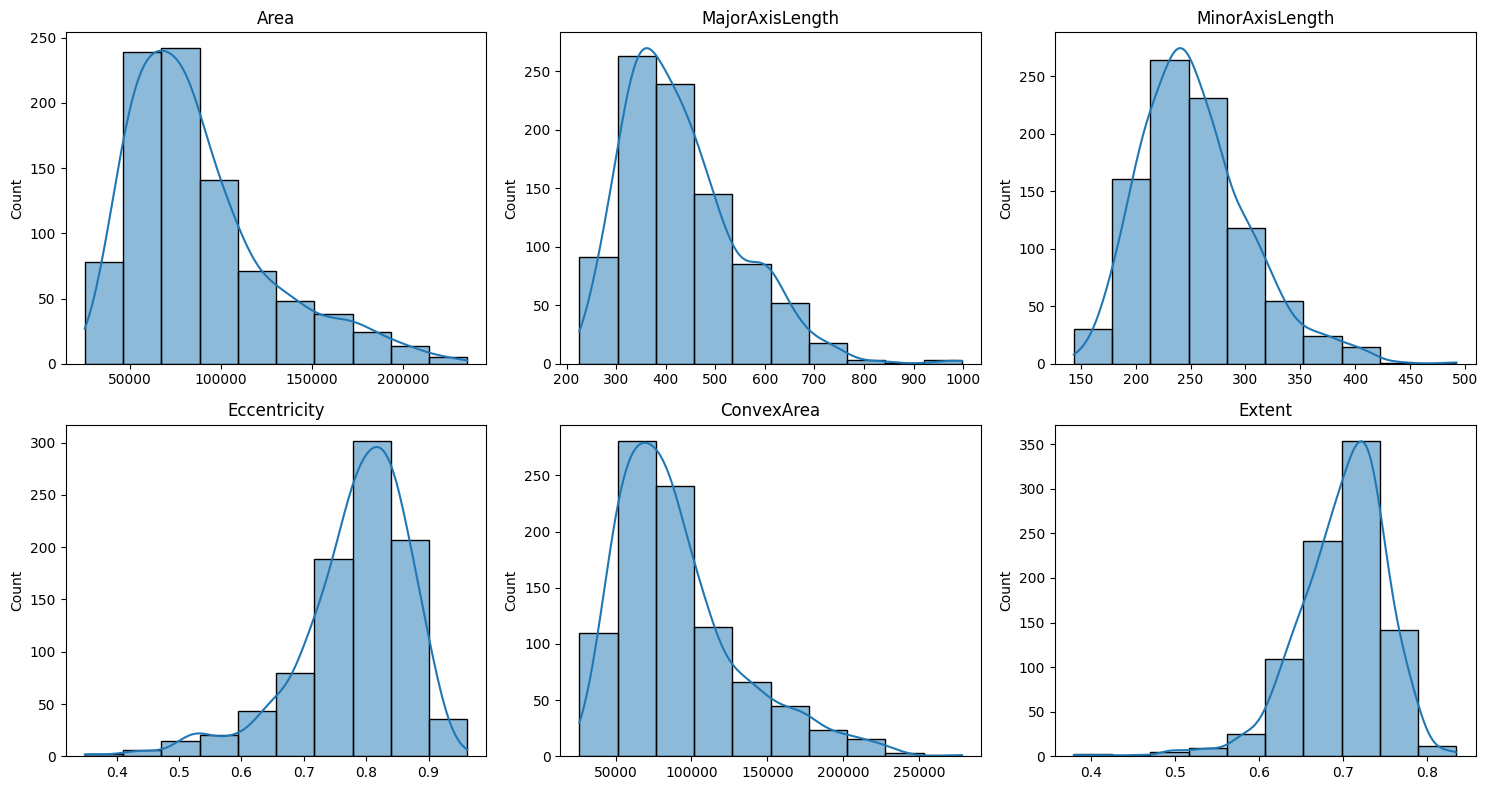

In [170]:
def plot_histograms(data, columns, rows=2, cols=3):
    """
    Plot histograms for specified columns in a dataframe.

    Args:
    df (pandas.DataFrame): The dataframe containing the data.
    columns (list): List of column names to plot.
    rows (int): Number of rows in the plot grid. Default is 2.
    cols (int): Number of columns in the plot grid. Default is 3.
    """ 
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    axes = axes.flatten()  # Flatten axes array for easy indexing

    for i, col in enumerate(columns):
        if i < len(axes):  # Check if we have enough subplots
            sns.histplot(data[col], kde=True, ax=axes[i], bins=10)
            axes[i].set_title(col)
            axes[i].set_xlabel('')  # Remove x-label as it's redundant with title

    # Remove unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show() 
    
plot_histograms(data, numeric_columns, rows=2, cols=3)    


In [171]:
numeric_data=data[numeric_columns]


In [172]:
numeric_data.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000


<Axes: >

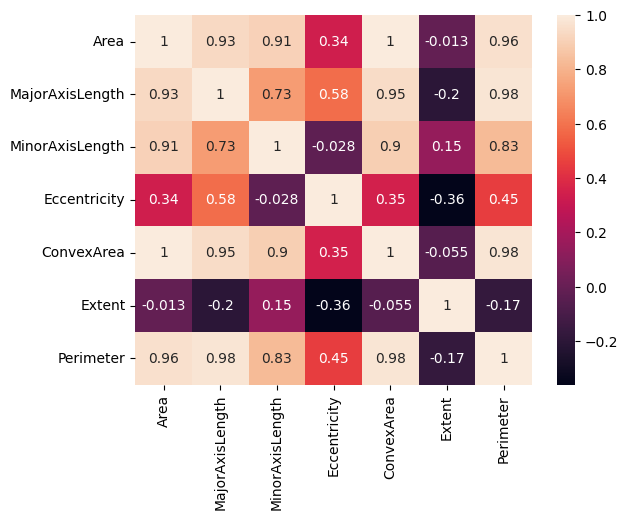

In [173]:
data_corr=numeric_data.corr()
sns.heatmap(data_corr,annot=True)

In [174]:
lb=LabelEncoder()

X=data.drop('Class',axis=1)
y=data["Class"]
y=lb.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [175]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [176]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test) 

In [177]:
classifers={
    'LogisticRegression':LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost':GradientBoostingClassifier(),
    'Ada boost' : AdaBoostClassifier(),
    'GaussianNB' :GaussianNB(),
    'SVM':SVC(kernel='rbf')
}  

In [178]:
for clf in range(len(list(classifers))):
    model=list(classifers.values())[clf]
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc



    print(list(classifers.keys())[clf])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')
    

LogisticRegression
Model performance for Training set
- Accuracy: 0.8681
- F1 score: 0.8680
- Precision: 0.8499
- Recall: 0.8904
- Roc Auc Score: 0.8683
----------------------------------
Model performance for Test set
- Accuracy: 0.8556
- F1 score: 0.8556
- Precision: 0.8778
- Recall: 0.8404
- Roc Auc Score: 0.8563


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7944
- F1 score: 0.7945
- Precision: 0.8202
- Recall: 0.7766
- Roc Auc Score: 0.7953


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8444
- F1 score: 0.8444
- Precision: 0.8511
- Recall: 0.8511
- Roc Auc Score: 0.8441


Gradient Boost
Model performance for Training set


c:\Users\Yusif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


##### Based on these metrics, the Random Forest and AdaBoost models perform the best, with identical test set accuracy (0.8667), F1 score (0.8667), and very similar ROC AUC scores (0.8664). These two models outperform the others across all main metrics.

##### Hyperparameters Optimization

In [179]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
adaboost_param={
    "n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME','SAMME.R']
}
param_dist = {
    'C': uniform(0.1, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': randint(100, 500)
}


In [180]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [181]:
adaboost_param

{'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}

In [182]:
randomcv_models=[
    ('RF',RandomForestClassifier(),rf_params),
    ("AB",AdaBoostClassifier(),adaboost_param),
    ("lG",LogisticRegression(),param_dist)
]

In [183]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}),
 ('lG',
  LogisticRegression(),
  {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x16e7524be60>,
   'penalty': ['l1', 'l2'],
   'solver': ['liblinear', 'saga'],
   'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x16e7516fe00>})]

In [184]:
model_param={}

for name,model,params in randomcv_models:
    random=RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1
    )
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Yusif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
78 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
62 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yusif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yusif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Yusif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
---------------- Best Params for AB -------------------
{'n_estimators': 50, 'algorithm': 'SAMME'}
---------------- Best Params for lG -------------------
{'C': 0.8598602580074276, 'max_iter': 111, 'penalty': 'l1', 'solver': 'liblinear'}


In [185]:
optimized_model={
    "Random Forest":RandomForestClassifier(n_estimators=100,min_samples_split=2,max_features=8,max_depth=10),
    "AdaBoost":AdaBoostClassifier(n_estimators=50,algorithm='SAMME'),
    "Logistic Regression":LogisticRegression(C=2.343267869132181,max_iter=202,penalty='l1',solver='liblinear')
}

In [186]:
for i in range(len(list(optimized_model))):
    model = list(optimized_model.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(optimized_model.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9917
- F1 score: 0.9917
- Precision: 0.9834
- Recall: 1.0000
- Roc Auc Score: 0.9918
----------------------------------
Model performance for Test set
- Accuracy: 0.8500
- F1 score: 0.8500
- Precision: 0.8526
- Recall: 0.8617
- Roc Auc Score: 0.8495


AdaBoost
Model performance for Training set
- Accuracy: 0.8694
- F1 score: 0.8691
- Precision: 0.8308
- Recall: 0.9242
- Roc Auc Score: 0.8700
----------------------------------
Model performance for Test set
- Accuracy: 0.8500
- F1 score: 0.8500
- Precision: 0.8602
- Recall: 0.8511
- Roc Auc Score: 0.8500


Logistic Regression
Model performance for Training set
- Accuracy: 0.8694
- F1 score: 0.8694
- Precision: 0.8522
- Recall: 0.8904
- Roc Auc Score: 0.8697
----------------------------------
Model performance for Test set
- Accuracy: 0.8611
- F1 score: 0.8612
- Precision: 0.8876
- Recall: 0.8404
- Roc Auc Score: 0.8621




Wrong predictions: 27


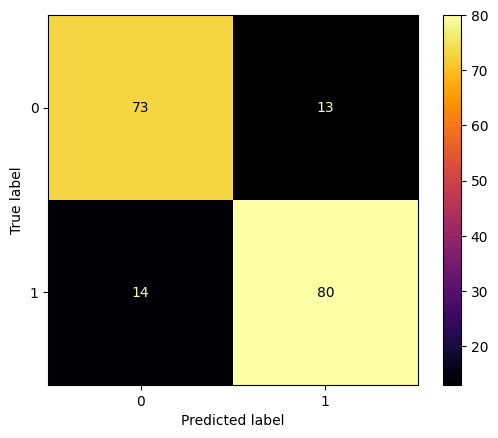

In [187]:
model = list(optimized_model.values())[1]
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
wrong_predictions = sum(y_pred != y_test)
print(f"Wrong predictions: {wrong_predictions}") 
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='inferno')


Wrong predictions: 26


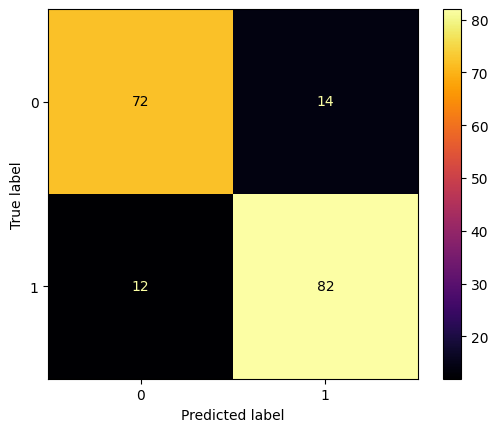

In [188]:
model = list(optimized_model.values())[0]
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
wrong_predictions = sum(y_pred != y_test)
print(f"Wrong predictions: {wrong_predictions}") 
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='inferno')

Wrong predictions: 25


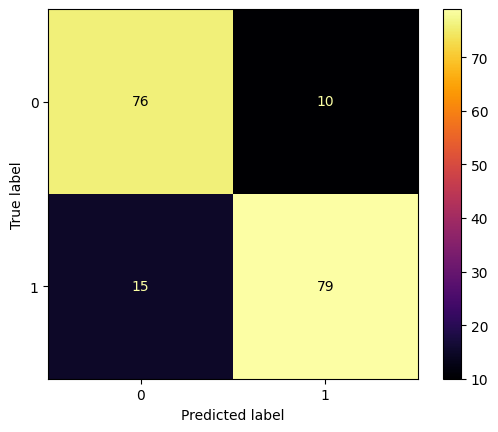

In [189]:
model = list(optimized_model.values())[2]
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
wrong_predictions = sum(y_pred != y_test)
print(f"Wrong predictions: {wrong_predictions}") 
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='inferno')